In [1]:
import os
import pandas as pd
import numpy as np
#from Tkinter import *
#import tkSnack
#root = Tk()
#tkSnack.initializeSnack(root)

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
path = "c:/Python27/qp2_py/frechet_distance/current_results/"
allFiles = os.listdir(path)
for name in allFiles:
    fname = path+name
    distances = pd.read_csv(fname, sep="_", header=None)
#print distances

In [82]:
distances.columns= ["speakerID", "speakerIPU", "comp_speaker", "comp_speakerIPU","frechetdistance"]

In [83]:
distances

,speakerID,speakerIPU,comp_speaker,comp_speakerIPU,frechetdistance
0,0,0,1,0,65.249969
1,0,0,1,1,66.515404
2,0,0,1,2,274.112701
3,0,0,1,3,84.120514
4,0,0,1,4,157.210114
5,0,0,1,5,79.410965
6,0,0,1,6,66.920204
7,0,0,1,7,129.865005
8,0,0,1,8,87.305168
9,0,0,1,9,70.002014


### Divide the dataframe in half or so

In [84]:
split = 20
distances_test = distances[distances["speakerID"]>= split]
distances_train = distances[distances["speakerID"]<split]

In [85]:
distances_test

,speakerID,speakerIPU,comp_speaker,comp_speakerIPU,frechetdistance
530443,20,0,21,0,209.623413
530444,20,0,21,1,136.540115
530445,20,0,21,2,298.300232
530446,20,0,21,3,138.460800
530447,20,0,21,4,139.526489
530448,20,0,21,5,334.210083
530449,20,0,21,6,239.785751
530450,20,0,21,7,370.820282
530451,20,0,21,8,130.361771
530452,20,0,21,9,123.545006


In [5]:
results = pd.read_csv("C:/Python27/qp2_py/frechet_distance/results_4_17.txt", sep="_", header=None)

In [6]:
check = pd.read_csv("C:/Python27/qp2_py/frechet_distance/check_ipus.txt", sep=" ", header=None)

In [50]:
check

,0,1
0,0,67
1,1,53
2,2,2
3,3,1
4,4,6
5,5,75
6,6,2
7,7,1
8,8,3
9,9,1


In [51]:
linecounts = [int(f) for f in list(check[1])]

In [52]:
s1 = list(results[0])
s1_ipus = list(results[1])
s2 = list(results[2])
s2_ipus = list(results[3])

In [53]:
comparisons = zip(s1, s1_ipus, s2, s2_ipus)

In [60]:
comp_dict = {}
for comp in comparisons:
    comp_dict[comp] = True

In [54]:
len(comparisons)

697850

In [62]:
sum(linecounts[:41])

367

In [63]:
(367*6)+(740*6)

6642

In [61]:
for i in range(41):
    print i
    for j in range(linecounts[i]):
        for k in range(i+1, 41):
            for l in range(linecounts[k]):
                if k!= 26 and (i,j,k,l) not in comp_dict:
                    print (i,j,k,l)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
(26, 101, 27, 0)
(26, 101, 27, 1)
(26, 101, 27, 2)
(26, 101, 27, 3)
(26, 101, 28, 0)
(26, 101, 28, 1)
(26, 101, 28, 2)
(26, 101, 28, 3)
(26, 101, 28, 4)
(26, 101, 28, 5)
(26, 101, 28, 6)
(26, 101, 28, 7)
(26, 101, 28, 8)
(26, 101, 28, 9)
(26, 101, 28, 10)
(26, 101, 28, 11)
(26, 101, 28, 12)
(26, 101, 28, 13)
(26, 101, 28, 14)
(26, 101, 28, 15)
(26, 101, 28, 16)
(26, 101, 28, 17)
(26, 101, 28, 18)
(26, 101, 28, 19)
(26, 101, 28, 20)
(26, 101, 28, 21)
(26, 101, 28, 22)
(26, 101, 28, 23)
(26, 101, 28, 24)
(26, 101, 28, 25)
(26, 101, 28, 26)
(26, 101, 28, 27)
(26, 101, 28, 28)
(26, 101, 28, 29)
(26, 101, 28, 30)
(26, 101, 28, 31)
(26, 101, 28, 32)
(26, 101, 28, 33)
(26, 101, 28, 34)
(26, 101, 28, 35)
(26, 101, 28, 36)
(26, 101, 28, 37)
(26, 101, 28, 38)
(26, 101, 28, 39)
(26, 101, 28, 40)
(26, 101, 28, 41)
(26, 101, 28, 42)
(26, 101, 28, 43)
(26, 101, 28, 44)
(26, 101, 28, 45)
(26, 101, 28, 46)
(26, 101, 28, 47)
(26, 10

In [86]:
labels = pd.read_csv("c:/Python27/qp2_py/labels/labels41_onlyqs.csv")

In [9]:
print labels

    Language
0    English
1    English
2    English
3    English
4   Mandarin
5   Mandarin
6   Mandarin
7   Mandarin
8    English
9   Mandarin
10   English
11   English
12   English
13   English
14  Mandarin
15   English
16   English
17   English
18  Mandarin
19   English
20   English
21   English
22   English
23  Mandarin
24   English
25  Mandarin
26  Mandarin
27  Mandarin
28  Mandarin
29  Mandarin
30  Mandarin
31  Mandarin
32  Mandarin
33  Mandarin
34  Mandarin
35  Mandarin
36  Mandarin
37  Mandarin
38  Mandarin
39  Mandarin
40   English


In [6]:
labels.iloc[0]["Language"]

'English'

df.index = df.Year
df.loc[1913:1914]

In [8]:
####for some reason this is broken now
from collections import defaultdict
ipuID = defaultdict(lambda:{})
IDtoLabel = defaultdict(str)
count = 0
for item in distances.iterrows():
    speakerID =  item[1]["speakerID"]
    speakerIPU = item[1]["speakerIPU"]
    if speakerIPU not in ipuID[speakerID]:
        ipuID[speakerID][speakerIPU]=count
        IDtoLabel[count] = labels.iloc[speakerID]["Language"]
        count +=1

TypeError: cannot do positional indexing on <class 'pandas.indexes.numeric.Int64Index'> with these indexers [0.0] of <type 'numpy.float64'>

In [87]:
###### I fixed it!  I fixed something!!!
from collections import defaultdict
ipuID = defaultdict(lambda:{})
IDtoLabel = defaultdict(str)
count = 0
for item in distances.iterrows():
    speakerID =  item[1]["speakerID"]
    speakerIPU = item[1]["speakerIPU"]
    speakerID = int(speakerID)
    speakerIPU = int(speakerIPU)
    if speakerIPU not in ipuID[speakerID]:
        ipuID[speakerID][speakerIPU]=count
        IDtoLabel[count] = labels.iloc[speakerID][0]
        count +=1

In [8]:
print IDtoLabel[0]

English


In [11]:
count

1213

In [12]:
count**2

1471369

In [175]:
###labels.iloc[speakID]["Language"]

IndexError: index 41 is out of bounds for axis 0 with size 41

In [88]:
dist_matrix = np.zeros([count,count])

In [81]:
#dist_matrix[:] = 75

In [89]:
dist_matrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [15]:
for item in distances.iterrows():
    speakerID = item[1]["speakerID"]
    speakerIPU = item[1]["speakerIPU"]
    compared_speaker = item[1]["comp_speaker"]
    compared_IPU = item[1]["comp_speakerIPU"]
    distance = item[1]["frechetdistance"]
    if compared_IPU in ipuID[compared_speaker]:
        id1 = ipuID[speakerID][speakerIPU]
        id2 = ipuID[compared_speaker][compared_IPU]
        dist_matrix[id1,id2] = distance

In [90]:
####### trying to train the matrix on half of the data
for item in distances_train.iterrows():
    speakerID = item[1]["speakerID"]
    speakerIPU = item[1]["speakerIPU"]
    compared_speaker = item[1]["comp_speaker"]
    compared_IPU = item[1]["comp_speakerIPU"]
    distance = item[1]["frechetdistance"]
    if compared_IPU in ipuID[compared_speaker]:
        id1 = ipuID[speakerID][speakerIPU]
        id2 = ipuID[compared_speaker][compared_IPU]
        dist_matrix[id1,id2] = distance

In [91]:
dist_matrix

array([[  0.      ,   0.      ,   0.      , ...,  69.01545 ,  67.204994,
         59.195515],
       [  0.      ,   0.      ,   0.      , ...,  84.960052,  84.960075,
         84.960602],
       [  0.      ,   0.      ,   0.      , ...,  61.030792,  55.655983,
         54.380981],
       ..., 
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]])

In [13]:
print dist_matrix

[[  0.         0.         0.       ...,  69.01545   67.204994  59.195515]
 [  0.         0.         0.       ...,  84.960052  84.960075  84.960602]
 [  0.         0.         0.       ...,  61.030792  55.655983  54.380981]
 ..., 
 [  0.         0.         0.       ...,   0.         0.         0.      ]
 [  0.         0.         0.       ...,   0.         0.         0.      ]
 [  0.         0.         0.       ...,   0.         0.         0.      ]]


### In which I try to fill the rest of these zeroes with the inverse?

In [27]:
print len(dist_matrix)
print len(dist_matrix[0])

1213
1213


In [78]:
dist2 = dist_matrix

In [80]:
for i in range(len(dist_matrix)):
    for j in range(len(dist_matrix[0])):
        dist2[j][i]=dist_matrix[i][j]

In [81]:
dist_matrix

array([[  0.      ,   0.      ,   0.      , ...,  69.01545 ,  67.204994,
         59.195515],
       [  0.      ,   0.      ,   0.      , ...,  84.960052,  84.960075,
         84.960602],
       [  0.      ,   0.      ,   0.      , ...,  61.030792,  55.655983,
         54.380981],
       ..., 
       [ 69.01545 ,  84.960052,  61.030792, ...,   0.      ,   0.      ,
          0.      ],
       [ 67.204994,  84.960075,  55.655983, ...,   0.      ,   0.      ,
          0.      ],
       [ 59.195515,  84.960602,  54.380981, ...,   0.      ,   0.      ,
          0.      ]])

In [97]:
#### why is this just printing out gibberish?  I would 
#np.save("c:/Python27/qp2_py/frechet_distance/dist_matrix_1207.txt", dist_matrix, allow_pickle=False)
np.savetxt("c:/Python27/qp2_py/frechet_distance/dist_matrix_1207.txt", dist_matrix)

infile = open("c:/Python27/qp2_py/frechet_distance/half_matrix.txt", "r")
in_matrix = np.load(infile)

In [9]:
#infile = open("c:/Python27/qp2_py/frechet_distance/half_matrix.txt", "r")
#in_matrix = np.load(infile)

IOError: Failed to interpret file <open file 'c:/Python27/qp2_py/frechet_distance/half_matrix.txt', mode 'r' at 0x0000000009C23E40> as a pickle

In [112]:
#in_matrix

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [92]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps = 2.0, metric="precomputed")
cluster.fit(dist_matrix)

DBSCAN(algorithm='auto', eps=2.0, leaf_size=30, metric='precomputed',
    min_samples=5, n_jobs=1, p=None)

In [114]:
## probably this will not work.
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps = 2.0, metric="precomputed")
x = cluster.fit_predict(dist_matrix, distances_test)

In [115]:
print x

[ 0  0  0 ..., 13 13 13]


In [116]:
cluster.labels_

array([ 0,  0,  0, ..., 13, 13, 13], dtype=int64)

In [117]:
print cluster_labels

[ 0  0  0 ..., 13 13 13]


In [118]:
print max(cluster.labels_)

13


In [119]:
length_cluster_labels = max(cluster.labels_)
cluster_labels = cluster.labels_

In [97]:
print len(cluster_labels)

1213


## In which we try to create some visualizations of the cluster features
- Note (4/5): When I try to do this with my better distance matrix (halved, and then adding in all of the 0 features with the other half, this breaks - says that the first argument of bincount must be non-negative?  But it's 0, so I don't know what is happening here.

In [120]:
## code by Hannah to get the cluster labels
cluster_map = np.empty((cluster_labels.max()+1, dist_matrix.shape[1]))
clabels = np.unique(cluster_labels)
for label, count in zip(np.unique(cluster_labels), np.bincount(cluster_labels)):
       cluster_map[label:,:] = (dist_matrix[cluster_labels==label].mean(axis=0))

<IPython.core.display.Javascript object>


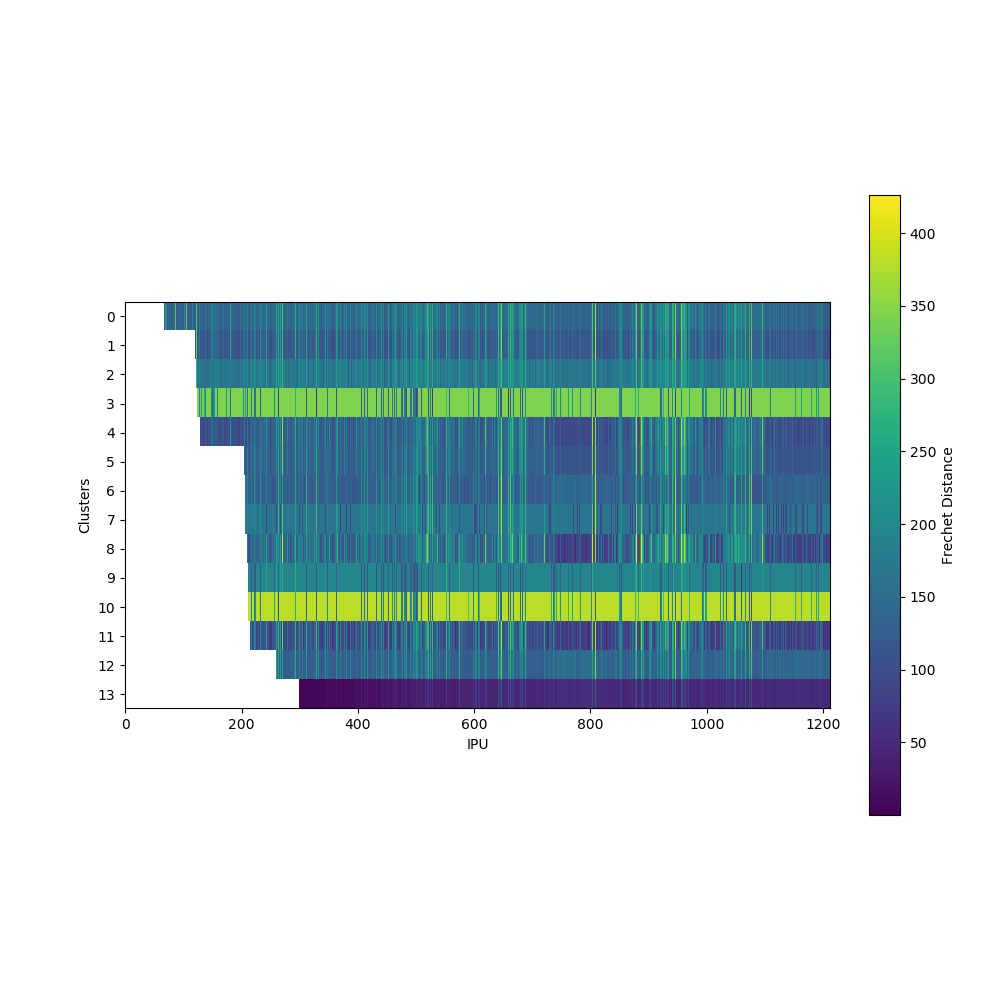

In [121]:
## makes a heatmap of the ipu distances, and the clusters
import matplotlib.cm as mcm
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=0.001)
cmap = mcm.viridis
cmap.set_under("White")
fig, ax = plt.subplots(figsize=(10,10))
R=50
clusterR = np.repeat(cluster_map, R, axis=0)
#sm = ax.imshow(clusterR, cmap=mcm.Greys)
sm = ax.imshow(clusterR, cmap=cmap, norm=norm)
ax.set_xlabel("IPU")
ax.set_ylabel("Clusters")
ax.set_yticks(np.arange(R/2, clusterR.shape[0],R))
ax.set_yticklabels(clabels)
cb = fig.colorbar(sm, ax=ax, fraction=.04)
cb.set_label("Frechet Distance")
#cb.set_ticks
#cb.set_ticklabels

In [122]:
histo = np.bincount(cluster_labels)
print histo

[ 67  53   2   1   6  75   2   1   3   1   1   2  45 954]


### Notes (3/17/17)
- More than half of our data (53.60%) is being assigned to one cluster (in this case, cluster 13)
    - I would LOVE to see the labels of what's being assigned to that cluster...

<IPython.core.display.Javascript object>


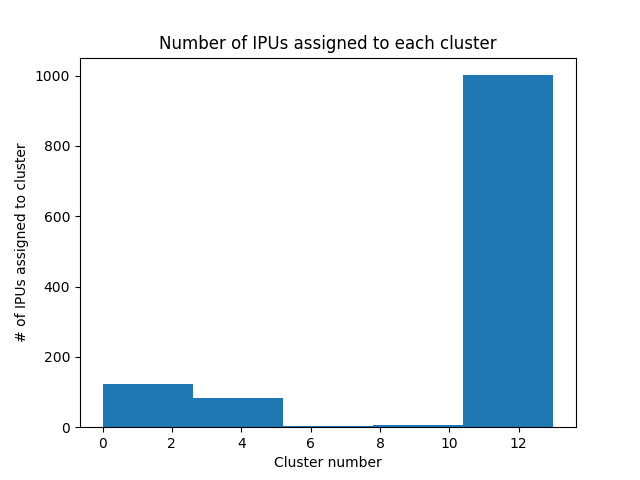

(array([  122.,    82.,     3.,     5.,  1001.]),
 array([  0. ,   2.6,   5.2,   7.8,  10.4,  13. ]),
 <a list of 5 Patch objects>)

In [123]:
plt.figure()
plt.title("Number of IPUs assigned to each cluster")
plt.xlabel("Cluster number")
plt.ylabel("# of IPUs assigned to cluster")
plt.hist(cluster_labels, bins=5)

In [58]:
print cluster_labels

[0 0 0 ..., 5 5 5]


### In which Pablo writes some code to organize feautres by speaker

In [226]:
#This is the code that collects the speaker based feature vectors
#This will contain one feature vector per speaker
speakerFeatures=[]
# THis has the corresponding labels in the same order
speakerLabels=[]
clusternumber=max(cluster_labels)+1
for speakID in ipuID:
    full=0
    thisFeatVect=np.zeros(clusternumber)
    for ipu in ipuID[speakID]:
        #get the number for the IPU
        ident=ipuID[speakID][ipu]
        #get the cluster to which it belongs
        cluster=cluster_labels[ident]
        if cluster!=-1:
        #add 1 to the count of that cluster
            thisFeatVect[cluster-1]+=1
            full+=1
        else:
            thisFeatVect[24]+=1
            full+=1
        
    #normalize the counts
    normFeatVect=[]
    #print len(thisFeatVect)
    for item in thisFeatVect:
        item=(item*1.0)/full
        normFeatVect.append(item)
    speakerFeatures.append(normFeatVect)
    label=labels.iloc[speakID]["Language"]
    speakerLabels.append(label)

In [227]:
###ONLY RUN THIS ONCE, DUMMY
print len(speakerLabels)
print len (speakerFeatures)
speakerFeatures=speakerFeatures[:-1]
speakerLabels = speakerLabels[:-1]


41
41


In [207]:
len(speakerFeatures)

40

### NOTE: talk to Pablo about what this did / does

### In which I try to make some percentage features (percentage of ipus assigned to each cluster), and this feature doesn't work as well as using the cluster labels themselves?  Does that make sense?

In [60]:
for i in cluster.labels_:
    print i

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
3
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
7
8
8
8
9
10
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13

In [68]:
percentage_out = []
for item in histo:
    percentage_out.append(item/float(histo.sum()))
    
print (percentage_out)

24


In [69]:
## what percentage of ipus are in each cluster?  still not speaker based, I don't think there's a way to do that
percent_features = []
for i in range(len(percentage_out)):
    percentage = [percentage_out[i]]
    multiplier = histo[i]
    outlist = percentage*multiplier
    for item in outlist:
        percent_features.append(item)

print len(percent_features)
    
    

1207


In [73]:
ipu_percentages = [[feat] for feat in percent_features]

In [65]:
x = [3]
print x*3

[3, 3, 3]


### A little bit of shit code below - notes from changing things to speaker based from before, but I can't really do that here, I don't think.
    

speaker_ipu_histograms = []
for speaker in all_ipu_coefs:
    scaled_ipu = scaler.transform(speaker)
    ipu_centers = cluster.predict(scaled_ipu)
    histo = np.bincount(ipu_centers, minlength=cluster.n_clusters) #set to to the clusteres we specificied before 
    #histo = np.bincount(ipu_centers, minlength=cluster.n_clusters) #set to to the clusteres we specificied before 
    speaker_ipu_histograms.append(histo / float(histo.sum()))

only_legendre = pd.DataFrame(speaker_ipu_histograms, columns=["cluster%d" % i for i in range(70)])
print only_legendre

### Below makes a feature vector using just the label of the cluster as a feature

In [124]:
features = [ [feat] for feat in cluster_labels ]

In [125]:
print features

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [2], [2], [3], [4], [4], [4], [4], [4], [4], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5],

In [126]:
clf_labels = [IDtoLabel[i]for i in range(len(features))]

In [105]:
print clf_labels

['English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English'

In [127]:
langlab = zip(clf_labels, cluster_labels)
import collections
c = dict(collections.Counter(langlab))

In [128]:
lcounts = {'English':np.zeros(clabels.max()+1), 'Mandarin':np.zeros(clabels.max()+1)}

In [129]:
for ((lang, clust), count) in c.items():
    lcounts[lang][clust] = count
   

<IPython.core.display.Javascript object>


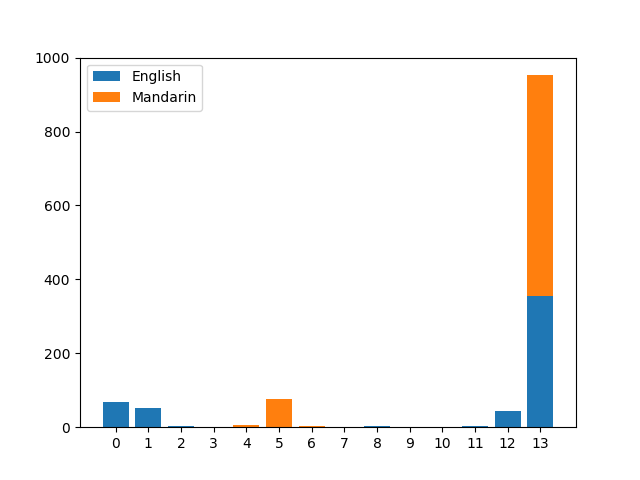

(0, 1000)

In [130]:
fig, ax = plt.subplots()
ax.bar(clabels, lcounts['English'], label="English")
ax.bar(clabels, lcounts['Mandarin'], bottom=lcounts['English'], label="Mandarin")
ax.set_xticks(clabels)
ax.legend()
ax.set_ylim((0,1000))

In [111]:
lcounts

{'English': array([  67.,   53.,    2.,    1.,    0.,    0.,    0.,    0.,    3.,
           0.,    1.,    2.,   45.,  354.]),
 'Mandarin': array([   0.,    0.,    0.,    0.,    6.,   75.,    2.,    1.,    0.,
           1.,    0.,    0.,    0.,  600.])}

In [106]:
print len(features),len(clf_labels)

1213 1213


In [34]:
print len(speakerFeatures[0])

NameError: name 'speakerFeatures' is not defined

In [112]:
count = 0
thirteen_labels = []
for i in range(len(features)):
    if features[i][0]==13:
        labs = clf_labels[i]
        thirteen_labels.append(labs)
print thirteen_labels

['English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Mandarin', 'Englis

#### More analysis, 3/17/17 
Holy crap.  Apart from cluster 13, each other cluster contains it in only IPUs with the same label.  Each other cluster is 100% labeled as English or labeled as Mandarin.  That is pretty damn cool.
What are we clustering by again?  IPU distance?  So the centers are distances, I think?  This is showing us a lot of solid, strong evidence that the distances are clusterable.  

53.6% of our data (so like 54% of our data / our distances) are being assigned to cluster 13.  Within cluster 13, English labels (ipu distances) make up 54.71% of that cluster, and Mandarin labels (ipu distances) make up 45.29% of that cluster.  Slight majority to English, but I bet that we could super cut this down.

What might this mean?
- This could mean that cluster 13 is where our distances are similar - they *are* all speaking English, after all
- This could also mean that this is where some of our distance computing errors might be (halving/doubling errors in computing distancs might make some of the distances between native and non-native language groups look more similar)
- This indicates that for slightly less than half of our data (approx 46%), the distances between native and non-native question contours are VERY SEPERABLE - different enough that they are getting assigned to different clusters, and these clusters are contain strictly within-label distances.  

## NOTE:
As of 3/17/17, IPU only cluster features give us 78% accuracy.  Just to verify this all still is working.  78% is not bad.

In [36]:
eng_count = 0
man_count = 0
for item in thirteen_labels:
    if item[0] == "E":
        eng_count = eng_count+1
    else:
        man_count = man_count+1
        
eng_percent = float(eng_count)/len(thirteen_labels)
man_percent = float(man_count)/len(thirteen_labels)

print eng_percent
print man_percent

0.542113323124
0.457886676876


In [37]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit

C:\Users\Rachel\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}



#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
#rom sklearn.svm import LinearSVC
grid_search = GridSearchCV(SVC(), param_grid, cv=10)

#X_train, X_test, y_train, y_test = train_test_split(features, clf_labels, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(features, clf_labels, random_state=0)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

C:\Users\Rachel\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'C': 1, 'gamma': 10}
0.756875687569


In [88]:
print len(speakerFeatures)

NameError: name 'speakerFeatures' is not defined

In [39]:
from sklearn.svm import SVC
classifier = SVC(C=1, gamma=10)
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import cross_val_score
shuffle_split = ShuffleSplit(1213, n_iter= 10, test_size=.25, train_size=.75)
shuffle_score = cross_val_score(classifier, features, clf_labels, cv=shuffle_split)
print shuffle_score
print shuffle_score.mean()

[ 0.75986842  0.77302632  0.76644737  0.75        0.76315789  0.75
  0.76644737  0.72039474  0.78618421  0.75      ]
0.758552631579


In [40]:
from sklearn.svm import SVC
classifier = SVC(C=1, gamma = 10)

X_train, X_test, y_train, y_test = train_test_split(features, clf_labels, random_state=0)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print score

0.736842105263


In [241]:
count_Eng = 0
count_Man = 0
total_Eng = 0
total_Man= 0
count_full = 0
total_instances=0
man_dist = []
eng_dist = []
full_dist = []
for i in range(len(dist_matrix)):
    for j in range(len(dist_matrix)):
        if IDtoLabel[i]==IDtoLabel[j]:
            if IDtoLabel[i]=="English":
                count_Eng+= dist_matrix[i][j]
                eng_dist.append(dist_matrix[i][j])
                total_Eng+=1
            else:
                count_Man+= dist_matrix[i][j]
                man_dist.append(dist_matrix[i][j])
                total_Man+=1
        count_full+= dist_matrix[i][j]
        total_instances+=1
        full_dist.append(dist_matrix[i][j])

        

In [101]:
avg_dist_Eng = count_Eng/float(total_Eng)
avg_dist_Man = count_Man/float(total_Man)
avg_dist = count_full/float(total_instances)

## Summary of results (speaker-based features) (8/30)
Why haven't I written this into my paper yet?  When did I do this?  I have 0 memory of this but that isn't necessary surprising.  Saves me work, though!  I believe me.
- With an eps of 2.0, we get 23 clusters, which is very close to creating one cluster per speaker.  By creating a binary feature vector, assigning each speaker to a cluster, we do pretty badly - hovering around 50% accuracy.  
- Eps of 6.0, we do better - 8 clusters, 63% accurate.  But this is still not as good as just using the clusters as binary features on their own.


## (6/29) SUMMARY OF RESULTS (with all but 7 of the IPUs).
### NOTE: STILL MAY NOT BE TOTALLY CORRECT (check distance matrix and frechet distances, results are still suspiciously high)
NOTE:  This is with an eps of 2.0
- English IPUs are closer to each other than to random distances
- English IPUs are closer to each other than Mandarin IPUs
- Mandarin IPUs are also closer to each other than they are to random distances
- All of this is statistically significant

In [102]:
print avg_dist_Eng
print avg_dist_Man
print avg_dist

71.6274103321
72.3356708586
75.3245833469


In [103]:
from scipy.stats import ttest_ind
p_eng = ttest_ind(eng_dist, full_dist)
p_man = ttest_ind(man_dist,full_dist)
print p_eng
print p_man

(-19.192959127799543, 4.3221592908332019e-82)
(-19.010998267846194, 1.4068339227360642e-80)


In [18]:
distance_labels = pd.DataFrame

In [38]:
type(labels.iloc[5])

pandas.core.series.Series

count = 0
for item in distances.iterrows():
    speakerID =  item[1][1]
    if speakersID == count:
        lab = label.iloc[count][0]
        distance_labels.append(lab)
    else: